In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/xgboost_v8/v8_new_attributes/v8_new_attr_train/v8_data.xlsx", sheet_name = 'v8_train_new')
data.head()

,OpportunityID,CreatedDate,FundedDate,OpportunityName,Priordeal_OppID,Renewal_PreviousCollectionStatus,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,...,Industry,Industry_Group__c,Avg_ReturnItemdays,LatestMonth_ReturnItemDays,PctChangeInReveune,PctAvgDailybalance2AvgMonthlyDeposits,TwoMonthAvg_AdjustedMonthlyDeposits,AdjustedMonthlyDeposits,drop_percent,Drop_category
0,0062M00000blHFEQA2,2018-12-03 22:40:43,2019-01-04,Orlando SeaWolves-New Deal-12032018,0064100000aUsacAAC,Other,100.0,0.30,572.0,1,...,Services,79 - Amusement and Recreation Services,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral/Null
1,0062M00000bmHA5QAM,2018-12-19 22:52:01,2019-01-14,Hafteh Bazaar Magazine-Renewal Deal-12192018,0064100000b8jUhAAI,Default,100.0,0.61,534.0,1,...,Manufacturing,"27 - Printing, Publishing, and Allied Industries",1.0,0.0,NaN,0.192806,21518.355,23759.0,10.412738,Positive
2,0062M00000bmhkAQAQ,2018-12-31 15:07:15,2019-01-03,Triple J Enterprises-Renewal Deal-12312018,0064100000b8R6zAAE,Other,100.0,0.55,537.0,1,...,Services,"75 - Automotive Repair, Services, and Parking",NaN,2.0,NaN,NaN,11706.000,10538.0,-9.977789,Negative
3,0062M00000bmKPLQA2,2018-12-20 18:06:27,2019-01-03,Elite Service Company-Renewal Deal-12202018,0064100000bAeaGAAS,Other,100.0,0.36,0.0,2,...,Construction,17 - Construction Special Trade Contractors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral/Null
4,0062M00000bmlCWQAY,2019-01-02 15:32:18,2019-01-07,NU Signs-Renewal Deal-01022019,0064100000bAfpKAAS,Other,100.0,0.54,0.0,1,...,Manufacturing,39 - Miscellaneous Manufacturing Industries,0.0,NaN,NaN,0.248474,32275.135,27807.5,-13.842358,Negative


In [4]:
data.shape

(3140, 49)

In [5]:
data.isna().sum().sort_values(ascending = False)/len(data)*100

NetWO                                    74.171975
HBwoLCF                                  51.719745
Renewal_PreviousHBwoLCF                  38.662420
LastBankStatement_OverdraftDays          25.382166
LatestMonth_ReturnItemDays               21.210191
PctChangeInReveune                       15.159236
Renewal_PreviousAvgMonthRevenue          14.267516
Renewal_PreviousAvgDailyBalance          14.267516
drop_percent                              6.433121
TwoMonthAvg_AdjustedMonthlyDeposits       6.369427
Renewal_PreviousCreditScore               1.082803
PctAvgDailybalance2AvgMonthlyDeposits     0.923567
BankStatement_Sum_NumReturnItems          0.891720
BankStatement_MA_NumReturnItems           0.891720
BankStatement_MA_OverdraftDays            0.891720
AvgDailybalance                           0.891720
AvgMonthlydeposits                        0.891720
Avg_ReturnItemdays                        0.891720
AdjustedMonthlyDeposits                   0.668790
Renewal_PreviousPaidPercentageO

# Check Anomalies

1. Perform EDA
2. check wos - remove missing but give in excel sheet:
3. Specifically take care of no of bank statements and all other attributes related to it:
4. Check again the pace rates - {check for extreme weird values} - min_val_check
5. Check for anomalies - time in business -ve_values
6. is this business home based - flag based  -
7. take care of features to be dropped - take previous references
8. fill the missing values - so as to keep the progress alive: 
9. EDA is completed - save the file

In [6]:
numerical_attributes = data.columns[data.dtypes!="object"]
categorical_attributes = data.columns[data.dtypes=="object"]
print("Numerical_attributes :", len(numerical_attributes), "\n")
print(numerical_attributes)
print('\n')
print("Categorical_attributes :", len(categorical_attributes), "\n")
print(categorical_attributes)

Numerical_attributes : 41 

Index(['CreatedDate', 'FundedDate', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_PreviousCreditScore',
       'Renewal_CountPreviousDeals', 'Renewal_PreviousCountBounces',
       'Renewal_PreviousPosition', 'Renewal_PreviousHBwLCF',
       'Renewal_PreviousHBwoLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'BankStatement_MA_OverdraftDays',
       'BankStatement_MA_NumReturnItems', 'BankStatement_Sum_NumReturnItems',
       'LastBankStatement_OverdraftDays', 'Credit_Score__c',
       'Time_in_Business__c', 'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'HBwoLCF', 'Contract_HoldBack__c', 'AvgMonthlydeposits',
       'AvgDailybalance', 'FundedAmount', 'Paybackamount', 'NewDeal_YN',
       'ActiveDeal_YN', 'WriteOff_YN', 'FundedWriteOffAmount_Gross',
       'WOGross_AdvanceBalance', 'NetWO', 'Avg_ReturnItemdays',
       'LatestMon

# Dropped the unwanted features

In [8]:
# Dropped unwanted features
data =  data.drop(['OpportunityName',
                   'Priordeal_OppID',
                   'CreatedDate',
                   'FundedDate', 
                   'Industry_Group__c',
                   'Renewal_PreviousCollectionStatus',
                   'ActiveDeal_YN',
                   'NewDeal_YN',
                   'Renewal_PreviousCreditScore',
                   'BankStatement_Sum_NumReturnItems',
                   'LastBankStatement_OverdraftDays',
                   'HBwoLCF',
                   'Contract_HoldBack__c',
                   'Renewal_PreviousHBwoLCF',
                   'NetWO'], axis=1)

In [9]:
data.shape

(3140, 34)

In [10]:
numerical_attributes = data.columns[data.dtypes!="object"]
categorical_attributes = data.columns[data.dtypes=="object"]
print("Numerical_attributes :", len(numerical_attributes), "\n")
print(numerical_attributes)
print('\n')
print("Categorical_attributes :", len(categorical_attributes), "\n")
print(categorical_attributes)

Numerical_attributes : 30 

Index(['Renewal_PreviousPace', 'Renewal_PreviousPaidPercentageOfRTR',
       'Renewal_CountPreviousDeals', 'Renewal_PreviousCountBounces',
       'Renewal_PreviousPosition', 'Renewal_PreviousHBwLCF',
       'Renewal_PreviousAvgMonthRevenue', 'Renewal_PreviousAvgDailyBalance',
       'Renewal_TwoWeekBounces', 'NumberOfBankStatements',
       'BankStatement_MA_OverdraftDays', 'BankStatement_MA_NumReturnItems',
       'Credit_Score__c', 'Time_in_Business__c', 'BBC_Position__c',
       'HB_with_LCF_Payment__c', 'AvgMonthlydeposits', 'AvgDailybalance',
       'FundedAmount', 'Paybackamount', 'WriteOff_YN',
       'FundedWriteOffAmount_Gross', 'WOGross_AdvanceBalance',
       'Avg_ReturnItemdays', 'LatestMonth_ReturnItemDays',
       'PctChangeInReveune', 'PctAvgDailybalance2AvgMonthlyDeposits',
       'TwoMonthAvg_AdjustedMonthlyDeposits', 'AdjustedMonthlyDeposits',
       'drop_percent'],
      dtype='object')


Categorical_attributes : 4 

Index(['OpportunityID

###  Observations

* Some attributes name updated, like -
   - FundedWriteOffAmount_Net = NetWO
   - AvgMonthRevenue = AvgMonthlydeposits                        
   - AvgDailyBalance = AvgDailybalance
   - Avg_ReturnItemsDays = Avg_ReturnItemdays                        
   - Pct change in Month Revenue = PctChangeInReveune
   - PctAvgDailybalance2AvgMonthlyRevenue = PctAvgDailybalance2AvgMonthlyDeposits     


* check - WriteOff_YN = should not be any missing values 
* Is_this_Business_home_based__c = Categorical to Numerical 
* Renewal_PreviousPace = remove anomoloies < 50% values 
* Time_in_Business__c = check and drop negative values  

### New added columns for decile analysis
* Paybackamount
* WOGross_AdvanceBalance

In [11]:
# check %_of_missing_values
data.isnull().sum().sort_values(ascending = False)/len(data)*100

LatestMonth_ReturnItemDays               21.210191
PctChangeInReveune                       15.159236
Renewal_PreviousAvgMonthRevenue          14.267516
Renewal_PreviousAvgDailyBalance          14.267516
drop_percent                              6.433121
TwoMonthAvg_AdjustedMonthlyDeposits       6.369427
PctAvgDailybalance2AvgMonthlyDeposits     0.923567
AvgDailybalance                           0.891720
Avg_ReturnItemdays                        0.891720
BankStatement_MA_NumReturnItems           0.891720
BankStatement_MA_OverdraftDays            0.891720
AvgMonthlydeposits                        0.891720
AdjustedMonthlyDeposits                   0.668790
Credit_Score__c                           0.382166
Renewal_PreviousPaidPercentageOfRTR       0.382166
Renewal_PreviousPace                      0.382166
Paybackamount                             0.063694
FundedAmount                              0.063694
WriteOff_YN                               0.063694
WOGross_AdvanceBalance         

In [ ]:
# with pd.ExcelWriter('/content/drive/MyDrive/missing_values_v7_train_data.xlsx') as writer:
#   data[data['PctChangeInReveune'].isna()].to_excel(writer, sheet_name = 'PctChangeInReveune')
#   data[data['LatestMonth_ReturnItemDays'].isna()].to_excel(writer, sheet_name = 'LatestMonth_ReturnItemDays')
#   data[data['Renewal_PreviousPaidPercentageOfRTR'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousPaidPercentageOfRTR')
#   data[data['Renewal_PreviousAvgMonthRevenue'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousAvgMonthRevenue')
#   data[data['PctAvgDailybalance2AvgMonthlyDeposits'].isna()].to_excel(writer, sheet_name = 'PctAvgDailybalance2AvgMonthlyDeposits')
#   data[data['AvgMonthlydeposits'].isna()].to_excel(writer, sheet_name = 'AvgMonthlydeposits')
#   data[data['Renewal_PreviousAvgDailyBalance'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousAvgDailyBalance')
#   data[data['AvgDailybalance'].isna()].to_excel(writer, sheet_name = 'AvgDailybalance')
#   data[data['Avg_ReturnItemdays'].isna()].to_excel(writer, sheet_name = 'Avg_ReturnItemdays')
#   data[data['BankStatement_MA_OverdraftDays'].isna()].to_excel(writer, sheet_name = 'BankStatement_MA_OverdraftDays')
#   data[data['BankStatement_MA_NumReturnItems'].isna()].to_excel(writer, sheet_name = 'BankStatement_MA_NumReturnItems')
#   data[data['Credit_Score__c'].isna()].to_excel(writer, sheet_name = 'Credit_Score__c')
#   data[data['Renewal_PreviousPace'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousPace')

In [12]:
data.corr()['WriteOff_YN']

Renewal_PreviousPace                     0.003857
Renewal_PreviousPaidPercentageOfRTR     -0.094769
Renewal_CountPreviousDeals              -0.082629
Renewal_PreviousCountBounces             0.019202
Renewal_PreviousPosition                 0.001106
Renewal_PreviousHBwLCF                  -0.016113
Renewal_PreviousAvgMonthRevenue          0.031748
Renewal_PreviousAvgDailyBalance          0.024916
Renewal_TwoWeekBounces                   0.052620
NumberOfBankStatements                  -0.031000
BankStatement_MA_OverdraftDays           0.034020
BankStatement_MA_NumReturnItems         -0.004928
Credit_Score__c                         -0.059046
Time_in_Business__c                     -0.108303
BBC_Position__c                          0.012788
HB_with_LCF_Payment__c                  -0.020895
AvgMonthlydeposits                       0.011068
AvgDailybalance                          0.003996
FundedAmount                             0.022262
Paybackamount                            0.024800


# Tasks to do -

* EDA - 
* -ves, replace it by 0    - WOGross_AdvanceBalance - **Done**
* 1 outlier - remove it - **Done**
* Pace rate - drop it <50%   - Renewal_PreviousPace - **Done**
* check for sir answer - **Done**
* decile analysis on and train data both 
* Contact us - to discuss hyper-parameter tuning

# WriteOff_YN

In [13]:
data['WriteOff_YN'].value_counts()

0.0    2327
1.0     811
Name: WriteOff_YN, dtype: int64

In [14]:
data['WriteOff_YN'].isna().sum()

2

In [15]:
data[data['WriteOff_YN'].isna()]['WriteOff_YN']

3138   NaN
3139   NaN
Name: WriteOff_YN, dtype: float64

In [16]:
data.drop(index=[3138, 3139], inplace = True)

In [17]:
data['WriteOff_YN'].isna().sum()

0

In [18]:
# check for %_skewness
print("Percenatge of Non_writeoff_deal: ", round(data['WriteOff_YN'].value_counts()[0]/len(data['WriteOff_YN'])*100), "%")
print("Percenatge of writeoff_deal: ", round(data['WriteOff_YN'].value_counts()[1]/len(data['WriteOff_YN'])*100), "%")

Percenatge of Non_writeoff_deal:  74 %
Percenatge of writeoff_deal:  26 %


In [ ]:
## Dealing with the categorical attributes - converting them with one hot encoding methods

#### Is_this_Business_home_based__c
#### Industry
#### Drop_category 

In [19]:
data = pd.get_dummies(data, columns = ['Is_this_Business_home_based__c'],drop_first= True)
data = pd.get_dummies(data, columns = ["Industry"], drop_first = True)
data = pd.get_dummies(data, columns = ["Drop_category"], drop_first = True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3138 entries, 0 to 3137
Data columns (total 44 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   OpportunityID                               3138 non-null   object 
 1   Renewal_PreviousPace                        3126 non-null   float64
 2   Renewal_PreviousPaidPercentageOfRTR         3126 non-null   float64
 3   Renewal_CountPreviousDeals                  3138 non-null   int64  
 4   Renewal_PreviousCountBounces                3138 non-null   int64  
 5   Renewal_PreviousPosition                    3138 non-null   int64  
 6   Renewal_PreviousHBwLCF                      3138 non-null   float64
 7   Renewal_PreviousAvgMonthRevenue             2691 non-null   float64
 8   Renewal_PreviousAvgDailyBalance             2691 non-null   float64
 9   Renewal_TwoWeekBounces                      3138 non-null   int64  
 10  NumberOfBank

In [21]:
data.head()

,OpportunityID,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousAvgMonthRevenue,Renewal_PreviousAvgDailyBalance,Renewal_TwoWeekBounces,...,"Industry_Finance, Insurance, Real Estate",Industry_Manufacturing,Industry_Mining,Industry_Retail,Industry_Services,Industry_Transportation & Public Utilities,Industry_Wholesale,Industry_Wholesale Trade,Drop_category_Neutral/Null,Drop_category_Positive
0,0062M00000blHFEQA2,100.0,0.30,1,0,3,0.0,NaN,NaN,0,...,0,0,0,0,1,0,0,0,1,0
1,0062M00000bmHA5QAM,100.0,0.61,1,4,1,0.0,NaN,NaN,1,...,0,1,0,0,0,0,0,0,0,1
2,0062M00000bmhkAQAQ,100.0,0.55,1,0,2,0.0,NaN,NaN,0,...,0,0,0,0,1,0,0,0,0,0
3,0062M00000bmKPLQA2,100.0,0.36,2,0,2,0.0,NaN,NaN,0,...,0,0,0,0,0,0,0,0,1,0
4,0062M00000bmlCWQAY,100.0,0.54,1,0,2,0.0,NaN,NaN,0,...,0,1,0,0,0,0,0,0,0,0


# Renewal_PreviousPace

In [22]:
data[data['Renewal_PreviousPace'].isna()]['Renewal_PreviousPace'] #fill this up

44     NaN
289    NaN
290    NaN
426    NaN
506    NaN
632    NaN
737    NaN
1005   NaN
1427   NaN
1624   NaN
1838   NaN
2190   NaN
Name: Renewal_PreviousPace, dtype: float64

In [23]:
data[data['Renewal_PreviousPace'] < 30][['Renewal_PreviousPace',"WriteOff_YN", "OpportunityID"]]

,Renewal_PreviousPace,WriteOff_YN,OpportunityID
1515,19.93,0.0,0062M00000lUkcxQAC
2136,20.00,1.0,0062M00000mTGVnQAO
2158,13.10,0.0,0062M00000mTWDDQA4
2493,11.54,0.0,0062M00000naBMrQAM


In [24]:
data.drop(index=[1515,2136,2158,2493], inplace = True)

In [25]:
data[data['Renewal_PreviousPace'] < 30]['Renewal_PreviousPace']

Series([], Name: Renewal_PreviousPace, dtype: float64)

In [ ]:
# data[data['Renewal_PreviousPace'] < 50][['Renewal_PreviousPace', 'OpportunityID']].to_excel('/content/drive/MyDrive/anomalies_pace_rate.xlsx', index = True)

#### Time_in_Business__c - cheking -ve values

In [26]:
data[data["Time_in_Business__c"]<0]["Time_in_Business__c"]

Series([], Name: Time_in_Business__c, dtype: float64)

In [ ]:
#data["Time_in_Business__c"] = data["Time_in_Business__c"].replace([-0.52,-0.85, -0.12, -1.07, -0.91, -0.72, -0.08, -0.06, -0.65, -0.37, -0.24], data["Time_in_Business__c"].median())

#### WOGross_AdvanceBalance


1.   Look for -ve values and replace them with zero

In [27]:
data['WOGross_AdvanceBalance'].describe()

count      3134.000000
mean       5078.713902
std       24381.380035
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      526048.400000
Name: WOGross_AdvanceBalance, dtype: float64

In [28]:
data[data['WOGross_AdvanceBalance'] > 0]['WOGross_AdvanceBalance']

2        4376.00
3       22088.00
4       15777.00
5        4920.00
6        5115.00
          ...   
3123     9660.04
3126     6896.61
3130    20544.41
3133     8312.08
3134    93566.65
Name: WOGross_AdvanceBalance, Length: 777, dtype: float64

In [29]:
data[(data['WOGross_AdvanceBalance'] < 0) & data['WriteOff_YN'] == 1][['WOGross_AdvanceBalance', 'WriteOff_YN']][:10]

,WOGross_AdvanceBalance,WriteOff_YN


In [30]:
# Thesre are technically the anomalies - need to treat them differently at the decile time 
data[(data['WOGross_AdvanceBalance'] == 0) & data['WriteOff_YN'] == 1][['WOGross_AdvanceBalance', 'FundedWriteOffAmount_Gross', 'WriteOff_YN']]

,WOGross_AdvanceBalance,FundedWriteOffAmount_Gross,WriteOff_YN
177,0.0,0.0,1.0
178,0.0,0.0,1.0
240,0.0,0.0,1.0
353,0.0,0.0,1.0
537,0.0,0.0,1.0
686,0.0,0.0,1.0
743,0.0,0.0,1.0
764,0.0,0.0,1.0
926,0.0,0.0,1.0
1070,0.0,0.0,1.0


In [31]:
len(data[(data['WOGross_AdvanceBalance'] == 0) & data['WriteOff_YN'] == 1][['WOGross_AdvanceBalance', 'WriteOff_YN']])

33

In [32]:
data[data['WOGross_AdvanceBalance'] < 0]['WOGross_AdvanceBalance']

Series([], Name: WOGross_AdvanceBalance, dtype: float64)

In [33]:
data[data['WOGross_AdvanceBalance'] < 0]['WriteOff_YN'].value_counts()

Series([], Name: WriteOff_YN, dtype: int64)

In [34]:
data[(data['WOGross_AdvanceBalance'] > 0) & data['WriteOff_YN'] == 1][['WOGross_AdvanceBalance', 'WriteOff_YN']]

,WOGross_AdvanceBalance,WriteOff_YN
2,4376.00,1.0
3,22088.00,1.0
4,15777.00,1.0
5,4920.00,1.0
6,5115.00,1.0
...,...,...
3123,9660.04,1.0
3126,6896.61,1.0
3130,20544.41,1.0
3133,8312.08,1.0


In [35]:
data[data["WOGross_AdvanceBalance"] > 0]["WriteOff_YN"].value_counts()

1.0    777
Name: WriteOff_YN, dtype: int64

In [ ]:
# replacing -ve values with zeros
# data['WOGross_AdvanceBalance'] = data['WOGross_AdvanceBalance'].apply(lambda x: 0 if x < 0 else x)

In [36]:
data[data['WOGross_AdvanceBalance'] == 0]['WriteOff_YN'].value_counts()

0.0    2324
1.0      33
Name: WriteOff_YN, dtype: int64

In [ ]:
'''
funded_amount = $1000
payback_amount = $1500
collected_amount = $800 || $1200 || $1500 (extra $200)
adv_wos_$ (opp_1) = $1500 - $800 = $700
adv_wos_$ (opp_1) = $1500 - $1200 = $300
adv_wos_$ (opp_1) = $1500 - ($1500 + $200) = -$200
'''


In [37]:
data[(data['WOGross_AdvanceBalance'] == 0) & (data['WriteOff_YN'] == 1)][["OpportunityID", "WOGross_AdvanceBalance", "WriteOff_YN"]]

,OpportunityID,WOGross_AdvanceBalance,WriteOff_YN
177,0062M00000dkhrMQAQ,0.0,1.0
178,0062M00000dkkW6QAI,0.0,1.0
240,0062M00000eQ4hQQAS,0.0,1.0
353,0062M00000gaJ35QAE,0.0,1.0
537,0062M00000iaYtqQAE,0.0,1.0
686,0062M00000iR1KaQAK,0.0,1.0
743,0062M00000isXVRQA2,0.0,1.0
764,0062M00000itIDEQA2,0.0,1.0
926,0062M00000jxz1WQAQ,0.0,1.0
1070,0062M00000kxpbRQAQ,0.0,1.0


In [ ]:
#data[(data['WOGross_AdvanceBalance'] == 0) & (data['WriteOff_YN'] == 1)][["OpportunityID", "WOGross_AdvanceBalance", "WriteOff_YN"]].index

In [ ]:
'''
data.drop(index= [38,  163,  208,  274,  803,  814,  822,  892,  949, 1310, 1422,
            1493, 1503, 1561, 1675, 1745, 2242, 2353, 2356, 2378, 2408, 2436,
            2481, 2490, 2534, 2639, 2682, 2706, 2740, 2779, 2911, 2986, 3135], inplace = True)
'''

#### BBC_Position__C

In [ ]:
data['BBC_Position__c']

0       3
1       1
2       2
3       1
4       2
       ..
3133    1
3134    1
3135    4
3136    1
3137    1
Name: BBC_Position__c, Length: 3134, dtype: int64

In [ ]:
data['BBC_Position__c'].value_counts()

1     1539
2      841
3      403
4      222
5       64
6       35
7        9
8        5
10       5
9        4
13       2
11       2
33       1
20       1
15       1
Name: BBC_Position__c, dtype: int64

In [38]:
data['BBC_Position__c'].describe()

count    3134.000000
mean        1.963306
std         1.466813
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        33.000000
Name: BBC_Position__c, dtype: float64

In [39]:
data['BBC_Position__c'].isna().sum()

0

In [40]:
data[data['BBC_Position__c'] < 0]['BBC_Position__c']


Series([], Name: BBC_Position__c, dtype: int64)

# NumberOfBankStatements                    

In [ ]:
# Related attributes -

# AvgMonthRevenue - column name updated
# Renewal_PreviousAvgMonthRevenue
# AvgDailyBalance - column name updated
# Renewal_PreviousAvgDailyBalance
# BankStatement_MA_OverdraftDays
# BankStatement_MA_NumReturnItems
# Avg_ReturnItemsDays - column name updated
# Pct change in Month Revenue  - column name updated
# PctAvgDailybalance2AvgMonthlyRevenue - column name updated
# LastBankStatement_OverdraftDays - dropped
# BankStatement_Sum_NumReturnItems - dropped


In [41]:
data.columns

Index(['OpportunityID', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'BankStatement_MA_OverdraftDays',
       'BankStatement_MA_NumReturnItems', 'Credit_Score__c',
       'Time_in_Business__c', 'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'AvgMonthlydeposits', 'AvgDailybalance', 'FundedAmount',
       'Paybackamount', 'WriteOff_YN', 'FundedWriteOffAmount_Gross',
       'WOGross_AdvanceBalance', 'Avg_ReturnItemdays',
       'LatestMonth_ReturnItemDays', 'PctChangeInReveune',
       'PctAvgDailybalance2AvgMonthlyDeposits',
       'TwoMonthAvg_AdjustedMonthlyDeposits', 'AdjustedMonthlyDeposits',
       'drop_percent', 'Is_this_Business_home_based__c_Yes',
       'Industry_Construction', 'Industry

In [42]:
print('Checking Missing Values -')
print('\n')
print('NumberOfBankStatements :', data['NumberOfBankStatements'].isna().sum())
print('AvgMonthlydeposits :' ,data['AvgMonthlydeposits'].isna().sum())          
print('AvgDailybalance :' ,data['AvgDailybalance'].isna().sum())
print('BankStatement_MA_NumReturnItems :', data['BankStatement_MA_NumReturnItems'].isna().sum())
print('BankStatement_MA_OverdraftDays :' ,data['BankStatement_MA_OverdraftDays'].isna().sum())

Checking Missing Values -


NumberOfBankStatements : 0
AvgMonthlydeposits : 28
AvgDailybalance : 28
BankStatement_MA_NumReturnItems : 28
BankStatement_MA_OverdraftDays : 28


In [43]:
def attribute_info(df_feature):
  print('Description of attribute :', '\n' )
  print(df_feature.describe(), '\n')
  print('Value counts of attribute :', '\n' )
  print(df_feature.value_counts(), '\n')
  print('Unique number of attribute :', '\n' )
  print(df_feature.unique(), '\n')
  print('Missing values in attribute :', '\n' )
  print(df_feature.isna().sum(), '\n')
  print('Missing values in attribute_% :', '\n' )
  print(df_feature.isna().sum()/len(df_feature)*100, '\n')
  plt.figure(figsize=(20,10))
  plt.subplot(2,2,1)
  sns.distplot(df_feature)
  plt.subplot(2,2,2)
  sns.boxplot(df_feature)
  plt.show()

In [44]:
data.isnull().sum().sort_values(ascending = False)/len(data)*100

LatestMonth_ReturnItemDays                    21.186981
PctChangeInReveune                            15.124442
Renewal_PreviousAvgDailyBalance               14.231015
Renewal_PreviousAvgMonthRevenue               14.231015
drop_percent                                   6.413529
TwoMonthAvg_AdjustedMonthlyDeposits            6.349713
PctAvgDailybalance2AvgMonthlyDeposits          0.925335
Avg_ReturnItemdays                             0.893427
BankStatement_MA_OverdraftDays                 0.893427
BankStatement_MA_NumReturnItems                0.893427
AvgMonthlydeposits                             0.893427
AvgDailybalance                                0.893427
AdjustedMonthlyDeposits                        0.670070
Renewal_PreviousPaidPercentageOfRTR            0.382897
Renewal_PreviousPace                           0.382897
Credit_Score__c                                0.382897
Industry_E-Commerce                            0.000000
Is_this_Business_home_based__c_Yes             0

In [ ]:
missing_attributes = ['LatestMonth_ReturnItemDays', 
                      'PctChangeInReveune', 
                      'Renewal_PreviousAvgMonthRevenue',
                      'Renewal_PreviousAvgDailyBalance',
                      'PctAvgDailybalance2AvgMonthlyDeposits',
                      'Avg_ReturnItemdays',
                      'Renewal_PreviousPaidPercentageOfRTR', 
                      'BankStatement_MA_OverdraftDays',           
                      'AvgMonthlydeposits',        
                      'BankStatement_MA_NumReturnItems',          
                      'AvgDailybalance',                                            
                      'Credit_Score__c',                          
                      'Renewal_PreviousPace',
                      'drop_percent',
                      'TwoMonthAvg_AdjustedMonthlyDeposits',
                      'AdjustedMonthlyDeposits']    

for col in missing_attributes:
  print('\033[1m'+'attribute_name :', col+'\033[0m')
  attribute_info(data[col])

In [46]:
data['Renewal_PreviousPaidPercentageOfRTR'].fillna(data['Renewal_PreviousPaidPercentageOfRTR'].median(), inplace = True)
data['BankStatement_MA_OverdraftDays'].fillna(data['BankStatement_MA_OverdraftDays'].median(), inplace = True)
data['AvgMonthlydeposits'].fillna(data['AvgMonthlydeposits'].median(), inplace = True)
data['BankStatement_MA_NumReturnItems'].fillna(data['BankStatement_MA_NumReturnItems'].median(), inplace = True)
data['AvgDailybalance'].fillna(data['AvgDailybalance'].median(), inplace = True)
data['LatestMonth_ReturnItemDays'].fillna(data['LatestMonth_ReturnItemDays'].median(),inplace = True)
data['PctChangeInReveune'].fillna(data['PctChangeInReveune'].median(),inplace = True)
data['PctAvgDailybalance2AvgMonthlyDeposits'].fillna(data['PctAvgDailybalance2AvgMonthlyDeposits'].median(),inplace = True)
data['Avg_ReturnItemdays'].fillna(data['Avg_ReturnItemdays'].median(),inplace = True)
data['Renewal_PreviousAvgMonthRevenue'].fillna(data['Renewal_PreviousAvgMonthRevenue'].median(),inplace = True)
data['Renewal_PreviousAvgDailyBalance'].fillna(data['Renewal_PreviousAvgDailyBalance'].median(),inplace = True)
data['Renewal_PreviousPace'].fillna(data['Renewal_PreviousPace'].median(),inplace = True)
data['drop_percent'].fillna(data['drop_percent'].median(),inplace = True)
data['TwoMonthAvg_AdjustedMonthlyDeposits'].fillna(data['TwoMonthAvg_AdjustedMonthlyDeposits'].median(),inplace = True)
data['AdjustedMonthlyDeposits'].fillna(data['AdjustedMonthlyDeposits'].median(),inplace = True)


In [47]:
credit_mean = data[(data['Credit_Score__c'] != 0) & (data['Credit_Score__c'] != 1)]['Credit_Score__c'].mean()
credit_mean

585.9409153005464

In [48]:
data['Credit_Score__c'].fillna(credit_mean,inplace = True)

Description of attribute : 

count    3134.000000
mean      549.679735
std       153.531983
min         0.000000
25%       532.000000
50%       578.000000
75%       621.750000
max       815.000000
Name: Credit_Score__c, dtype: float64 

Value counts of attribute : 

0.0      164
595.0     32
1.0       30
550.0     30
578.0     28
        ... 
748.0      1
697.0      1
438.0      1
458.0      1
767.0      1
Name: Credit_Score__c, Length: 320, dtype: int64 

Unique number of attribute : 

[572.        533.        537.          0.        524.        636.
 647.        615.        528.        619.        531.        467.
 614.        522.        610.        640.        671.        539.
 526.        509.        543.        558.        483.        699.
 620.        686.        565.        658.        545.        484.
 546.        541.        504.        586.        457.        621.
 493.        659.        673.        563.        713.        527.
 623.        739.        485.        684.     

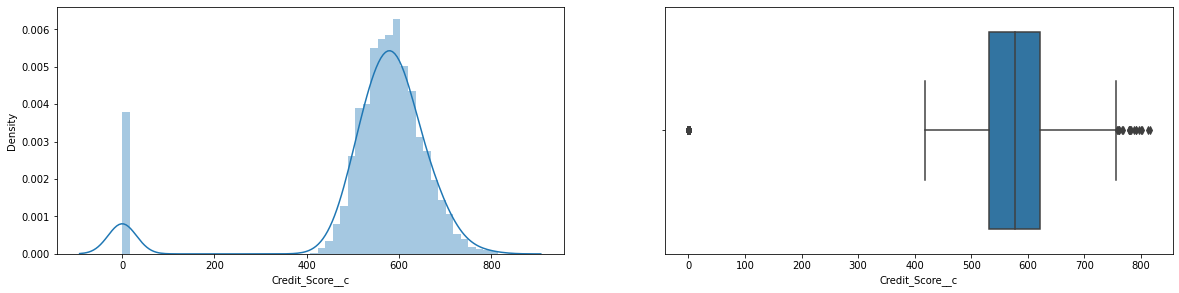

In [49]:
attribute_info(data['Credit_Score__c'])

In [50]:
data.isnull().sum().sort_values(ascending = False)/len(data)*100

OpportunityID                                 0.0
Renewal_PreviousPace                          0.0
Avg_ReturnItemdays                            0.0
LatestMonth_ReturnItemDays                    0.0
PctChangeInReveune                            0.0
PctAvgDailybalance2AvgMonthlyDeposits         0.0
TwoMonthAvg_AdjustedMonthlyDeposits           0.0
AdjustedMonthlyDeposits                       0.0
drop_percent                                  0.0
Is_this_Business_home_based__c_Yes            0.0
Industry_Construction                         0.0
Industry_E-Commerce                           0.0
Industry_Finance, Insurance, Real Estate      0.0
Industry_Manufacturing                        0.0
Industry_Mining                               0.0
Industry_Retail                               0.0
Industry_Services                             0.0
Industry_Transportation & Public Utilities    0.0
Industry_Wholesale                            0.0
Industry_Wholesale Trade                      0.0


In [51]:
data.to_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/xgboost_v8/v8_new_attributes/v8_new_attr_train/v8_after_eda_data.xlsx',index = False)